# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from pandas import DataFrame
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
weather_data = DataFrame (cities,columns=['City'])
weather_data

622


,City
0,busselton
1,kapaa
2,khatanga
3,brae
4,port elizabeth
...,...
617,inirida
618,solnechnyy
619,eureka
620,corinto


In [3]:
# create a empty dataframe to store data
weather_data["Lat"] = ""
weather_data["Lng"] = ""
weather_data["Max_Temp"] = ""
weather_data["Cloudiness"] = ""
weather_data["Humidity"] = ""
weather_data["Wind_Speed"] = ""
weather_data["country"] = ""
weather_data["date"] = ""
weather_data

,City,Lat,Lng,Max_Temp,Cloudiness,Humidity,Wind_Speed,country,date
0,busselton,,,,,,,,
1,kapaa,,,,,,,,
2,khatanga,,,,,,,,
3,brae,,,,,,,,
4,port elizabeth,,,,,,,,
...,...,...,...,...,...,...,...,...,...
617,inirida,,,,,,,,
618,solnechnyy,,,,,,,,
619,eureka,,,,,,,,
620,corinto,,,,,,,,


## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# url = "http://api.openweathermap.org/data/2.5/weather?appid="+ weather_api_key + "&q="

# Loop through the cities_pd and run a lat/long search for each city
for index, row in weather_data.iterrows():
    base_url = "http://api.openweathermap.org/data/2.5/weather?appid="+ weather_api_key + "&q="

    # make request
    city = row['City']
    cities_lat_lng = requests.get(base_url + city)
    
    # convert to json
    cities_lat_lng = cities_lat_lng.json()
    
    try:
        weather_data.loc[index, "Lat"] = cities_lat_lng['coord']['lat']
        weather_data.loc[index, "Lng"] = cities_lat_lng['coord']['lon']
        weather_data.loc[index, "Max_Temp"] = cities_lat_lng['main']['temp_max']
        weather_data.loc[index, "Cloudiness"] = cities_lat_lng['clouds']['all']
        weather_data.loc[index, "Humidity"] = cities_lat_lng['main']['humidity']
        weather_data.loc[index, "Wind_Speed"] = cities_lat_lng['wind']['speed']
        weather_data.loc[index, "country"] = cities_lat_lng['sys']['country']
        weather_data.loc[index, "date"] = cities_lat_lng['dt']
    
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
# Visualize to confirm lat lng appear
weather_data


Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

,City,Lat,Lng,Max_Temp,Cloudiness,Humidity,Wind_Speed,country,date
0,busselton,-33.65,115.33,289.26,1,67,4.92,AU,1603147753
1,kapaa,22.08,-159.32,302.59,40,78,7.2,US,1603147753
2,khatanga,71.97,102.5,260.35,33,96,0.28,RU,1603147753
3,brae,60.4,-1.35,281.15,100,87,17,GB,1603147753
4,port elizabeth,-33.92,25.57,289.15,75,87,6.2,ZA,1603147486
...,...,...,...,...,...,...,...,...,...
617,inirida,3.87,-67.92,299.3,87,79,0.73,CO,1603147497
618,solnechnyy,50.72,136.63,272.43,0,76,2.15,RU,1603147772
619,eureka,40.8,-124.16,289.26,90,93,4.3,US,1603147508
620,corinto,37.94,22.96,289.26,55,70,2.15,GR,1603147545


## Convert Raw Data to DataFrame
* Save as csv

In [5]:
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)

weather_data['Lat'] = pd.to_numeric(weather_data['Lat'],errors='coerce')
weather_data['Lng'] = pd.to_numeric(weather_data['Lng'],errors='coerce')
weather_data['Max_Temp'] = pd.to_numeric(weather_data['Max_Temp'],errors='coerce')
weather_data['Cloudiness'] = pd.to_numeric(weather_data['Cloudiness'],errors='coerce')
weather_data['Humidity'] = pd.to_numeric(weather_data['Humidity'],errors='coerce')
weather_data['Wind_Speed'] = pd.to_numeric(weather_data['Wind_Speed'],errors='coerce')
weather_data['date'] = pd.to_numeric(weather_data['date'],errors='coerce')
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        622 non-null    object 
 1   Lat         569 non-null    float64
 2   Lng         569 non-null    float64
 3   Max_Temp    569 non-null    float64
 4   Cloudiness  569 non-null    float64
 5   Humidity    569 non-null    float64
 6   Wind_Speed  569 non-null    float64
 7   country     622 non-null    object 
 8   date        569 non-null    float64
dtypes: float64(7), object(2)
memory usage: 38.9+ KB


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

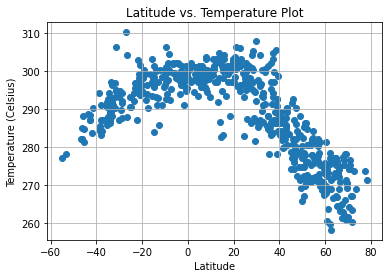

In [6]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max_Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature Plot")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Temperature.png")

# Show plot
plt.show()

## Northern Hemisphere(LAT>=0) has lower temperature than the Southern Hemisphere.

### Latitude vs. Humidity Plot

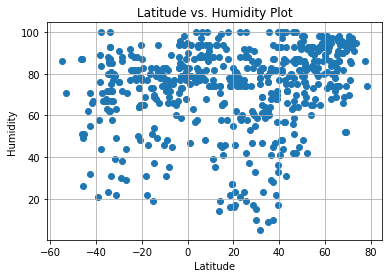

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity Plot")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Humidity.png")

# Show plot
plt.show()

## Northern Hemisphere(LAT>=0) has evenly distributed Humidity with the Southern Hemisphere.

### Latitude vs. Cloudiness Plot

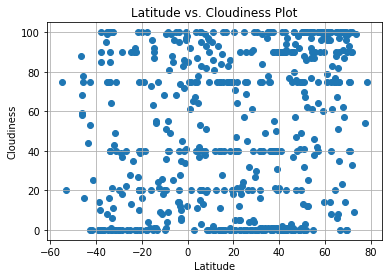

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness Plot")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Cloudiness.png")

# Show plot
plt.show()

## Northern Hemisphere(LAT>=0) has evenly distributed Cloudiness with the Southern Hemisphere.

### Latitude vs. Wind Speed Plot

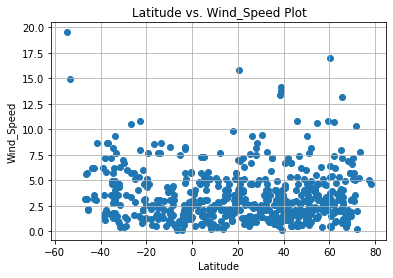

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind_Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind_Speed Plot")
plt.ylabel("Wind_Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Wind_Speed.png")

# Show plot
plt.show()

## Northern Hemisphere(LAT>=0) has evenly distributed Wind Speed with the Southern Hemisphere.

## Linear Regression

### Write linear regression plot function (optional)

In [10]:
weather_dataN = weather_data[weather_data['Lat']>=0]
weather_dataS =weather_data[weather_data['Lat']<0]
weather_dataN

,City,Lat,Lng,Max_Temp,Cloudiness,Humidity,Wind_Speed,country,date
1,kapaa,22.08,-159.32,302.59,40.0,78.0,7.20,US,1.603148e+09
2,khatanga,71.97,102.50,260.35,33.0,96.0,0.28,RU,1.603148e+09
3,brae,60.40,-1.35,281.15,100.0,87.0,17.00,GB,1.603148e+09
8,malumfashi,11.79,7.62,297.13,0.0,35.0,2.41,NG,1.603148e+09
9,bardiyah,31.76,25.09,296.06,75.0,75.0,3.43,LY,1.603148e+09
...,...,...,...,...,...,...,...,...,...
617,inirida,3.87,-67.92,299.30,87.0,79.0,0.73,CO,1.603147e+09
618,solnechnyy,50.72,136.63,272.43,0.0,76.0,2.15,RU,1.603148e+09
619,eureka,40.80,-124.16,289.26,90.0,93.0,4.30,US,1.603148e+09
620,corinto,37.94,22.96,289.26,55.0,70.0,2.15,GR,1.603148e+09


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7615117440770852


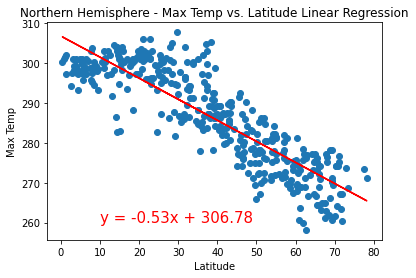

In [11]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values1 = weather_dataN['Lat'].astype('float')
y_values1 = weather_dataN['Max_Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values1, y_values1)
regress_values1 = x_values1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values1,y_values1)

# Plot regression line
plt.plot(x_values1,regress_values1,"r-")
plt.annotate(line_eq,(10,260),fontsize=15,color="red")

# Label plot
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude.png")

# Show plot
plt.show()

## There is a moderate negative relaltionship between max temp and latitude in the Northern Hemisphere.

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.5258160442697029


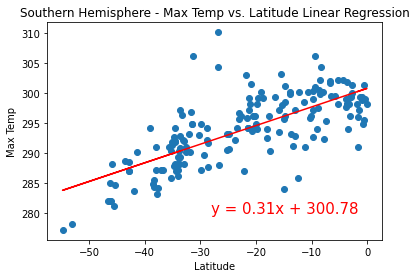

In [12]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values2 = weather_dataS['Lat'].astype('float')
y_values2 = weather_dataS['Max_Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values2, y_values2)
regress_values2 = x_values2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values2,y_values2)

# Plot regression line
plt.plot(x_values2,regress_values2,"r-")
plt.annotate(line_eq,(-28,280),fontsize=15,color="red")

# Label plot
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude.png")

# Show plot
plt.show()

## There is a strong postive relaltionship between max temp and latitude in the Southern Hemisphere.

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.050906866646265564


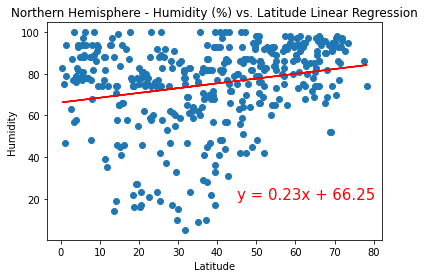

In [13]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values3 = weather_dataN['Lat'].astype('float')
y_values3 = weather_dataN['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values3, y_values3)
regress_values3 = x_values3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values3,y_values3)

# Plot regression line
plt.plot(x_values3,regress_values3,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")

# Label plot
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Northern Hemisphere - Humidity vs. Latitude.png")

# Show plot
plt.show()

## There is moderate postitive relaltionship between Humidity (%) and latitude in the Northern Hemisphere.

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.02567191849720837


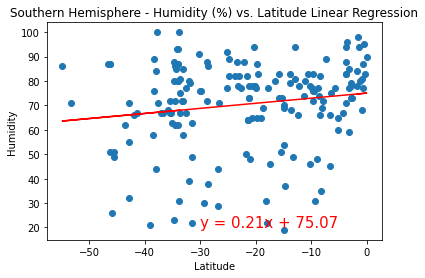

In [14]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values4 = weather_dataS['Lat'].astype('float')
y_values4 = weather_dataS['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values4, y_values4)
regress_values4 = x_values4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values4,y_values4)

# Plot regression line
plt.plot(x_values4,regress_values4,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")

# Label plot
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude.png")

# Show plot
plt.show()

## There is a little negative relaltionship between Humidity (%) and latitude in the Southern Hemisphere.

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.05874824443818205


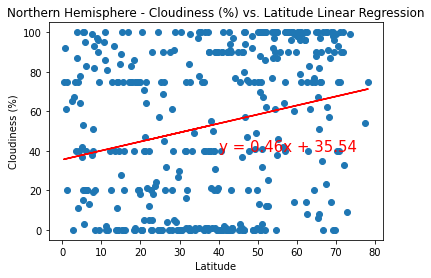

In [15]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values5 = weather_dataN['Lat'].astype('float')
y_values5 = weather_dataN['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values5, y_values5)
regress_values5 = x_values5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values5,y_values5)

# Plot regression line
plt.plot(x_values5,regress_values5,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")

# Label plot
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

# Show plot
plt.show()

## There is moderate positive relaltionship between Cloudiness (%) and latitude in the Northern Hemisphere.

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.00032869156081561865


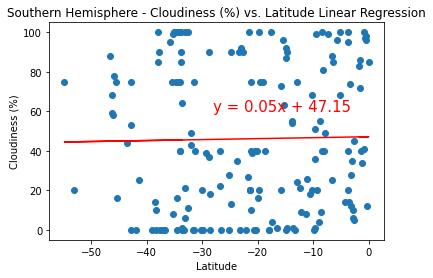

In [16]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values6 = weather_dataS['Lat'].astype('float')
y_values6 = weather_dataS['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values6, y_values6)
regress_values6 = x_values6 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values6,y_values6)

# Plot regression line
plt.plot(x_values6,regress_values6,"r-")
plt.annotate(line_eq,(-28,60),fontsize=15,color="red")

# Label plot
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude.png")

# Show plot
plt.show()

## There is a moderate positive relaltionship between Cloudiness (%)  and latitude in the Southern Hemisphere.

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.009650696757681538


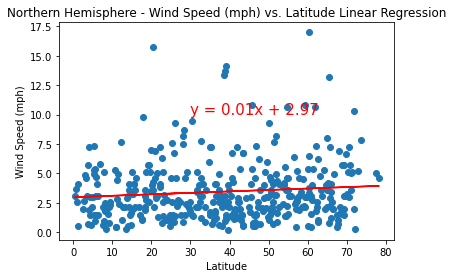

In [17]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values7 = weather_dataN['Lat'].astype('float')
y_values7 = weather_dataN['Wind_Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values7, y_values7)
regress_values7 = x_values7 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values7,y_values7)

# Plot regression line
plt.plot(x_values7,regress_values7,"r-")
plt.annotate(line_eq,(30,10),fontsize=15,color="red")

# Label plot
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")

# Show plot
plt.show()

## There is almost no relaltionship between Wind Speed (mph) and latitude in the Northern Hemisphere.

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.10237780213380197


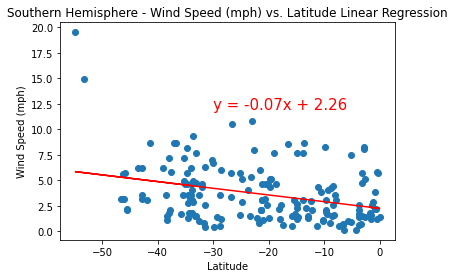

In [18]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values8 = weather_dataS['Lat'].astype('float')
y_values8 = weather_dataS['Wind_Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values8, y_values8)
regress_values8 = x_values8 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values8, y_values8)

# Plot regression line
plt.plot(x_values8,regress_values8,"r-")
plt.annotate(line_eq,(-30,12),fontsize=15,color="red")

# Label plot
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")

# Show plot
plt.show()

## There is a little negative relaltionship between Wind Speed (mph) and latitude in the Southern Hemisphere.